# Problem Statement - I

### Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

-If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

<b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

<b>All other cases:</b> All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

<b>Approved:</b> The Company has approved loan Application

<b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

<b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc.).

<b>Unused offer:</b>  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# About The Files

1. <b>application_data.csv</b>  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. <b>previous_application.csv</b> contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. <b>columns_description.csv</b> is data dictionary which describes the meaning of the variables.

In [82]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
#Load the csv files
application=pd.read_csv('application_data.csv')
prev_application=pd.read_csv('previous_application.csv')

In [172]:
#For displaying all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Analysis on application_data

In [173]:
#Display the first five rows
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [174]:
# Datatype information
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [175]:
#Finding the null percentage storing them in new dataframe renaming the columns name and storing a columns which have moe then 40% of missing values
temp=application.isnull().mean().reset_index()
temp[0]=temp[0]*100
temp=temp.rename(columns={'index':'column_name',0:'%missing values'})
temp=temp.sort_values(by=['%missing values'],ascending=False)
cols_to_drop=list(temp[temp['%missing values']>40]['column_name'])
cols_to_drop

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [176]:
#Dropping the null values of columns which have more then 40% null values
application.drop(cols_to_drop,axis=1,inplace=True)

### After dropping columns which have more then 40% of missing values we can see that still there are missing values so we impute them with appropriate values

In [177]:
100*application.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [178]:
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [179]:
cont=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','CNT_CHILDREN','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE']

### Here the columns which have less then 40% missing values we inpute them with median values because median have less impact on outliers and we use median because these columns have numerical values.

In [180]:
for i in cont:
    if application[i].isnull().mean()>0:
        imp_val=application[i].median()
        application[i]=application[i].fillna(imp_val)

In [181]:
100*application.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### CNT_FAM_MEMBERS Imputation

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64



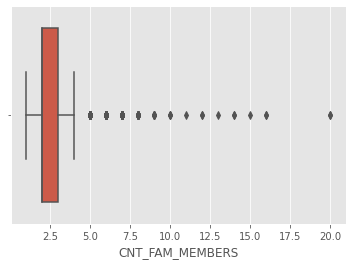

In [182]:
# Checking for outlier using discribe method and boxplot
print(round(application.CNT_FAM_MEMBERS.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(x=application.CNT_FAM_MEMBERS)
plt.show()

### Observation: Looking at statistical summary we can say 
- that it has outlier but values are not wrong.
- People can have different number of family members.
- Since it has less missing values so dropping them will not make any diffrence.

### OCCUPATION_TYPE Column imputation

In [183]:
#Finding the most frequent value
application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### Observation
- Majority of people who applied for loan working as Laborers.
- Here we handle null values in separate column because if we impute them with frequent value so it will tip the scale to imbalance hence we categorise its value as 'others'.

In [184]:
# Filling NaN values with others
application.OCCUPATION_TYPE=application.OCCUPATION_TYPE.fillna(value='Unknown')

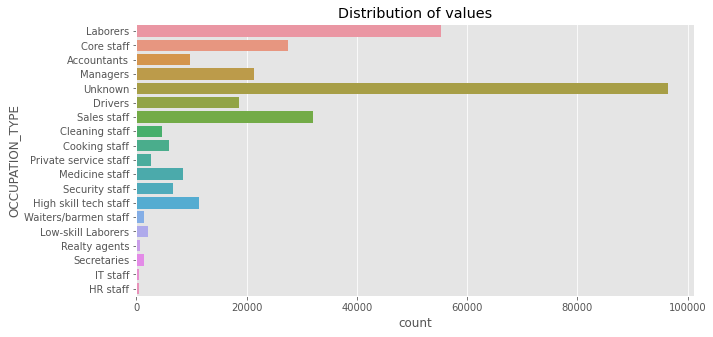

In [185]:
# Plotting a countplot to see distribution of values
plt.figure(figsize=[10,5])
sns.countplot(data=application,y='OCCUPATION_TYPE')
plt.title("Distribution of values")
plt.show()

### EXT_SOURCE_3 Imputation

### Observation
- EXT_SOURCE_3: Normalized score from external data source. It is a numerical column.
- Missing value percentage is 19.825307
- We can use boxplot to check for outliers


count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64



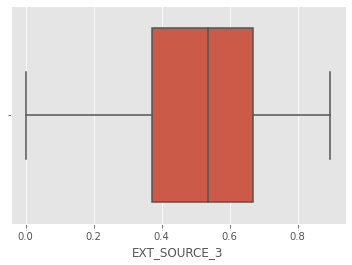

In [186]:
print(round(application.EXT_SOURCE_3.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(x=application.EXT_SOURCE_3)
plt.show()

### Observation
- We can see that EXT_SOURCE_3 has no outliers
- It has high missing values so we can drop it

### OBS_30_CNT_SOCIAL_CIRCLE Imputation

### Observation
- OBS_30_CNT_SOCIAL_CIRCLE number of client's social surroundings with observable 30 DPD (days past due) default is a numerical column
- Missing value percentage is 0.332021
- We can use describe method and boxplot to check outliers

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


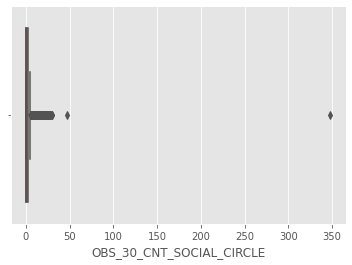

In [187]:
print(round(application.OBS_30_CNT_SOCIAL_CIRCLE.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(x=application.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

### Observation
- As we can clearly see it has outlier so we impute it with median value

In [188]:
# Filling NaN with median value
application.OBS_30_CNT_SOCIAL_CIRCLE.fillna(value=application.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

### Inspecting incorrect/unknown data values

#### Inspecting CODE_GENDER column
Observation:
- Gender can bee female or male.

In [189]:
# Checking the distribution of genders
application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Observation:
- Female applicants are just twise of male applicants.
- XNA indicate that some people do not wish to specify their gender.

In [190]:
# Finding the rows which have XNA values
application[application['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,Unknown,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.461482,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,Unknown,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,0.360613,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


Observation
- We can impute XNA with F
- Count of XNA is very low so it would not impact on unbalance data.

In [191]:
# Replacing XNA with F and checking the count of female and male
application.CODE_GENDER=application.CODE_GENDER.apply(lambda x:'F' if x=='XNA' else x)
application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### As the dataset have negative so we need to handle these values so for handling them we convert them into positive values by using abs method.

In [192]:
def abs_val(val):
    return abs(val)


In [193]:
application.DAYS_BIRTH=application.DAYS_BIRTH.apply(abs_val)
application.DAYS_EMPLOYED=application.DAYS_EMPLOYED.apply(abs_val)
application.DAYS_REGISTRATION=application.DAYS_REGISTRATION.apply(abs_val)
application.DAYS_ID_PUBLISH=application.DAYS_ID_PUBLISH.apply(abs_val)
application.DAYS_LAST_PHONE_CHANGE=application.DAYS_LAST_PHONE_CHANGE.apply(abs_val)


### Inspecting DAYS_BIRTH column

In [194]:
application.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [195]:
#Extracting year from DAYS_BIRTH column
application['Birth_Year']=application.DAYS_BIRTH.apply(lambda x:(x//365))
application.Birth_Year.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Birth_Year, dtype: float64

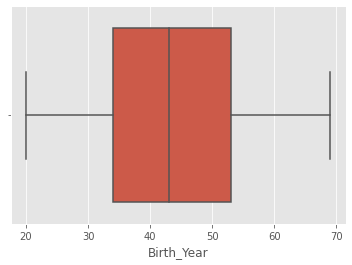

In [196]:
sns.boxplot(x=application.Birth_Year)
plt.show()

### Inspecting NAME_FAMILY_STATUS

In [197]:
#Finding the distribution of values
application.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Observations:
- By looking at values we can say that married people are most likely to take loan.
- Value Unknown shows that some people does not want to specify their status

In [198]:
# Checking the row which have unknown values
application[application['NAME_FAMILY_STATUS']=='Unknown']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Birth_Year
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,12396,1161,3265.0,4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,NaN,3.0,0.0,3.0,0.0,876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,33
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,12844,232,1597.0,1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,35


Observation
- Data looks valid
- We can impute unknown values with mode i.e.'Married'

In [199]:
# Imputing the value with mode
application['NAME_FAMILY_STATUS']=application['NAME_FAMILY_STATUS'].apply(lambda x:'Married' if x=='Unknown' else x)

### Checking data imbalance

In [200]:
#Data imbalance
application['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

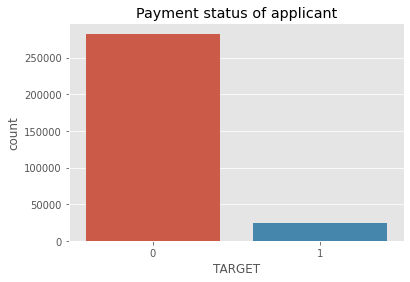

In [201]:
#Plotting countplot for distribution of values
sns.countplot(data=application,x=application.TARGET)
plt.title('Payment status of applicant')
plt.show()

### Data imbalance ratio

In [202]:
non_default=application[application.TARGET==0]
default=application[application.TARGET==1]
print("no of non defaulters:",non_default.shape[0])
print("no of defaulters:",default.shape[0])

no of non defaulters: 282686
no of defaulters: 24825


Observation:
- This data is highly imbalanced as number of defaulter are low.

Data imbalance ratio:
- Non-defaulter: Defaulter= 92:8=23:2

### Approach:
For analysing application data we divide the dataset in to different segments then visulise these segments. 

#### Segment 1: Documents of applicants

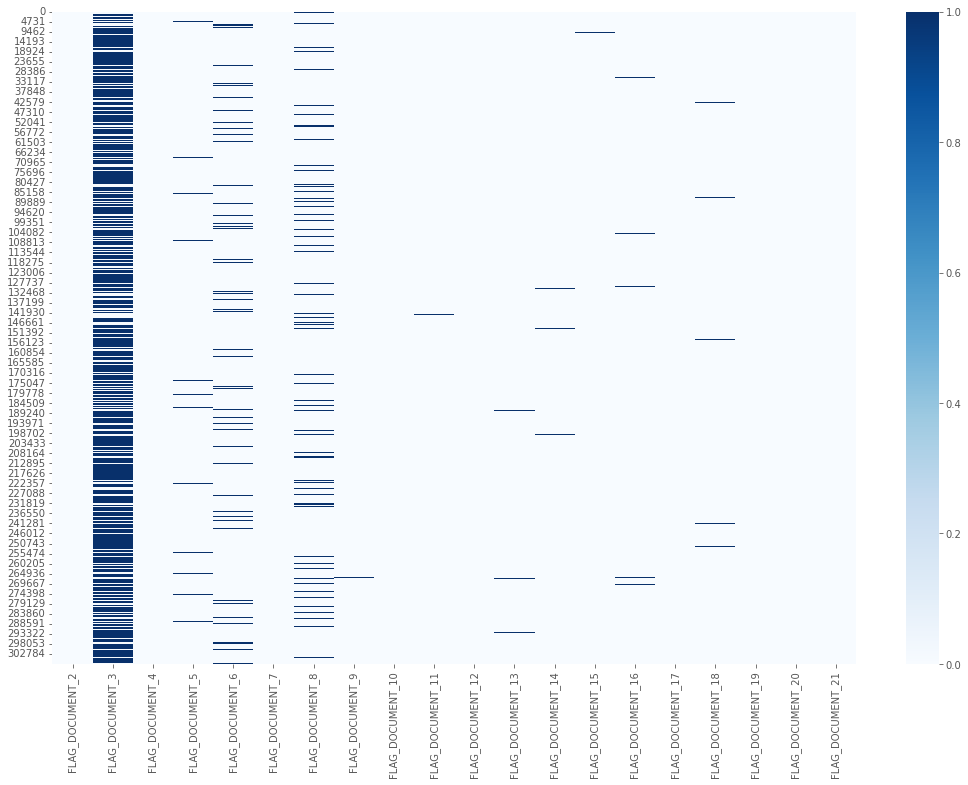

In [203]:
start=application.columns.get_loc('FLAG_DOCUMENT_2')
end=application.columns.get_loc('FLAG_DOCUMENT_21')+1
plt.figure(figsize=[18,12])
sns.heatmap(application.iloc[:,start:end],cmap='Blues')
plt.show()

Observation:
- As we can see most appliant doesn't submit other document except flag document 2.
- So we can drop other columns

### Segment 2: House_type

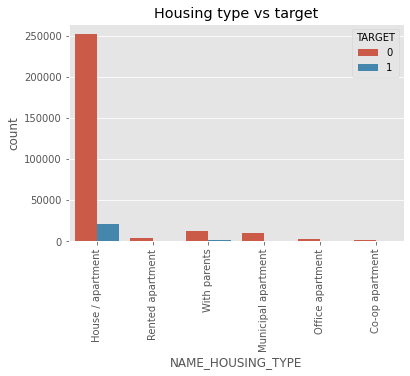

In [204]:
#Plotting countplot for NAME_HOUSING_TYPE and target
plt.figure()
sns.countplot(data=application,x=application.NAME_HOUSING_TYPE,hue=application['TARGET'])
plt.title('Housing type vs target')
plt.xticks(rotation=90)
plt.show()

Observation:
- We can see the applicants who lives in house/apartment are mostly non-defalulters.

### Segment 3: Social circle 

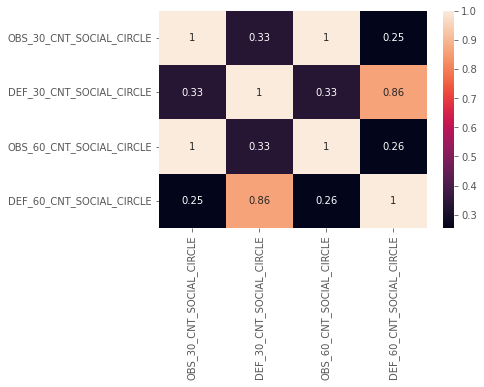

In [205]:
start=application.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end=application.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')
sns.heatmap(application.iloc[:,start:end+1].corr(),annot=True)
plt.show()

Observation:
- DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE are highly corelated.

### Segment 4: Region related data

In [206]:
start=application.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end=application.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')



In [207]:
region_df=application.iloc[:,start:end+1]
region_df['REGION_RATING_CLIENT']=application['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY']=application['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET']=application['TARGET']

In [208]:
sns.heatmap(region_df,annot=True)
plt.show()


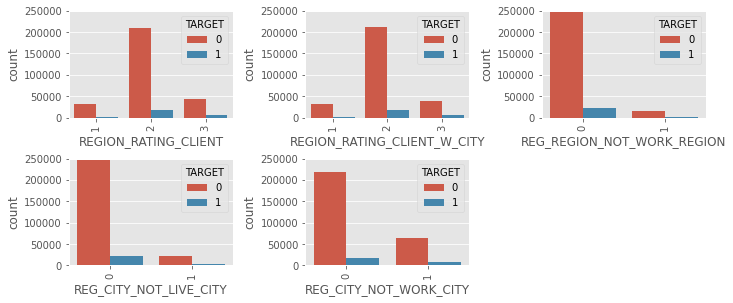

In [209]:
fig=plt.subplots(figsize=(10,10))
for i,j in enumerate(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']):
    plt.subplot(5,3,i+1,ylim=(0,250000))
    plt.subplots_adjust(hspace=1.2)
    sns.countplot(x=application[j],hue=application['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()
   

Observation:
- Non-defaulter rate is high REG_REGION_NOT_WORK_REGION=0 i.e work and permanent address is same.
- Most applicant have rating 2.

### Segment 5: Contact related info

In [210]:
contact_df=application[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']]

In [212]:
sns.heatmap(contact_df,annot=True)

### Segment 6: Asset info 

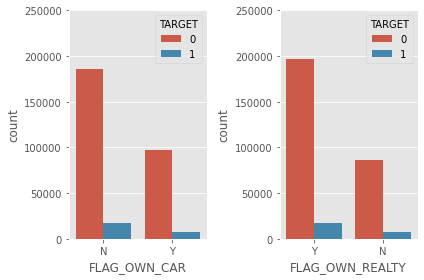

In [213]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1,ylim=(0,250000))
ax2=fig.add_subplot(1,2,2,ylim=(0,250000))
sns.countplot(x=application['FLAG_OWN_CAR'],hue=application['TARGET'],ax=ax1)
sns.countplot(x=application['FLAG_OWN_REALTY'],hue=application['TARGET'],ax=ax2)
plt.tight_layout()
plt.show()

Observation:
- Many people own realty and many people does not own car.
- Default rate is slightly high for people who own realty and who do not own car.

### Segment 7: Family Related details

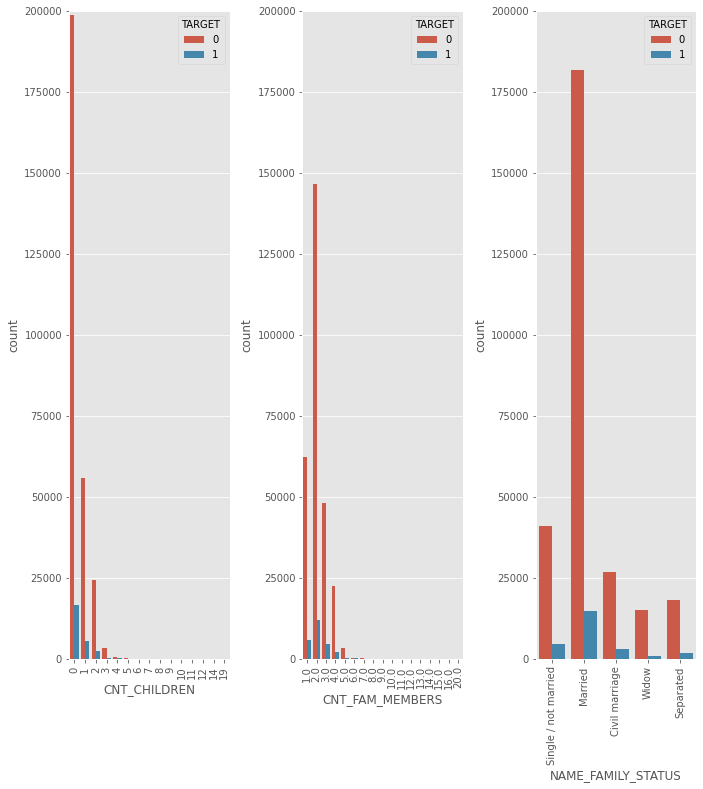

In [214]:
fig=plt.subplots(figsize=(10,10))
for i,j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS']):
    plt.subplot(1,3,i+1,ylim=(0,200000))
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=application[j],hue=application['TARGET'])
    plt.tight_layout()
    plt.xticks(rotation=90)


Observation:
- The default rate is high for applicant who have children count 0 and 1.
- The default rate is high for applicant who are single or married.

### Segment 8: Education and occupation

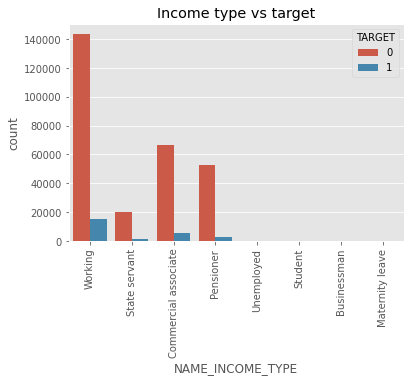

In [215]:
fig=plt.figure()
sns.countplot(x=application['NAME_INCOME_TYPE'],hue=application['TARGET'])
plt.title('Income type vs target')
plt.xticks(rotation=90)
plt.show()

Observation:
- Most of the applicants are working.
- Working applicants have high default rate

### Segment 9: Occupation info

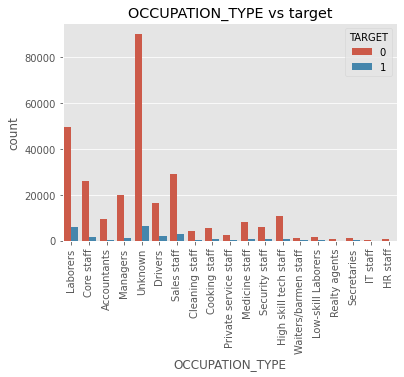

In [216]:
fig=plt.figure()
sns.countplot(x=application['OCCUPATION_TYPE'],hue=application['TARGET'])
plt.title('OCCUPATION_TYPE vs target')
plt.xticks(rotation=90)
plt.show()

### Gender vs Target

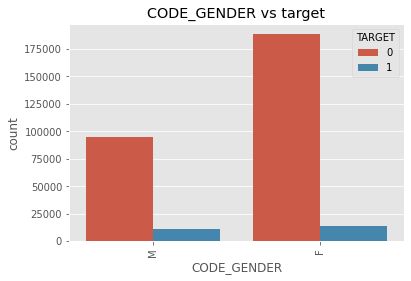

In [217]:
fig=plt.figure()
sns.countplot(x=application['CODE_GENDER'],hue=application['TARGET'])
plt.title('CODE_GENDER vs target')
plt.xticks(rotation=90)
plt.show()

Observation:
- Females are more in number.
- Default rate is high for male applicants.

In [218]:
#Converting days_birth to age
application['age']=application.DAYS_BIRTH//(-365.25)

In [219]:
application.drop('DAYS_BIRTH',inplace=True,axis=1)

In [220]:
application.age=application.age.apply(abs_val)
application[['age']].describe()

,age
count,307511.000000
mean,44.404607
std,11.945771
min,21.000000
25%,34.000000
50%,44.000000
75%,54.000000
max,70.000000


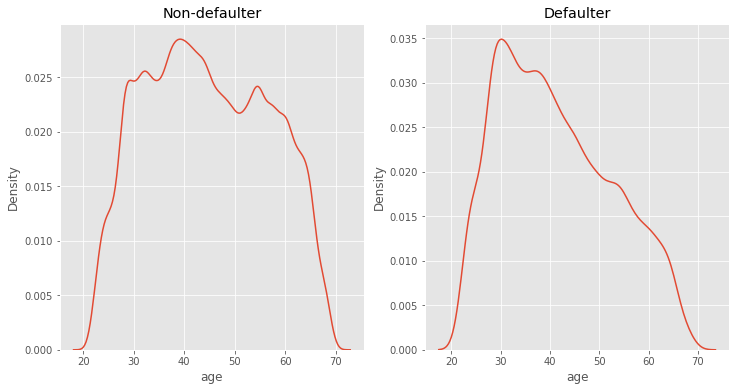

In [221]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,title='Non-defaulter')
ax2=fig.add_subplot(1,2,2,title='Defaulter')
sns.kdeplot(application[application['TARGET']==0]['age'],ax=ax1)
sns.kdeplot(application[application['TARGET']==1]['age'],ax=ax2)
plt.show()

Observation:
- People of age 30 have high default rate.


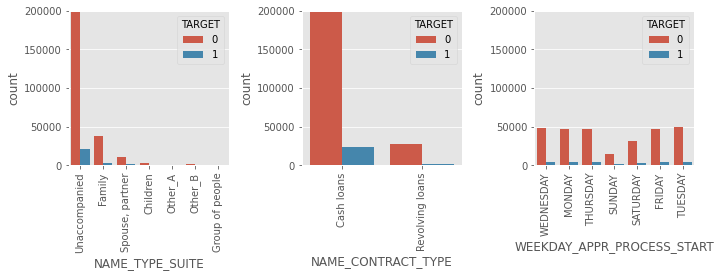

In [222]:
fig=plt.subplots(figsize=(10,10))
for i,j in enumerate(['NAME_TYPE_SUITE','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3,3,i+1,ylim=(0,200000))
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=application[j],hue=application['TARGET'])
    plt.tight_layout()
    plt.xticks(rotation=90)

Observation:
- Most of the applicants are unaccompanied while applying for loan.
- Default rate is high for cash loan.
- All weekdays have similar applicants then weekends.

<AxesSubplot:>

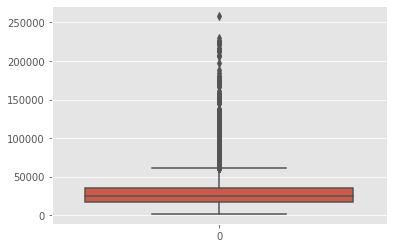

In [223]:
#Finding outliers
sns.boxplot(application['AMT_ANNUITY'])

<AxesSubplot:>

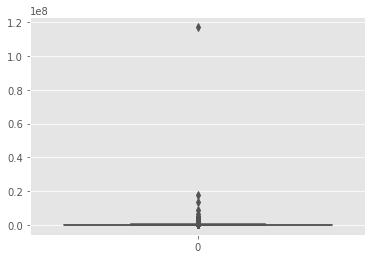

In [224]:
#Finding outliers
sns.boxplot(application['AMT_INCOME_TOTAL'])

In [225]:
#handling outliers
application=application[application['AMT_ANNUITY']<np.percentile(application['AMT_ANNUITY'],99)]

In [226]:
#handling outliers
application=application[application['AMT_INCOME_TOTAL']<np.percentile(application['AMT_INCOME_TOTAL'],99)]

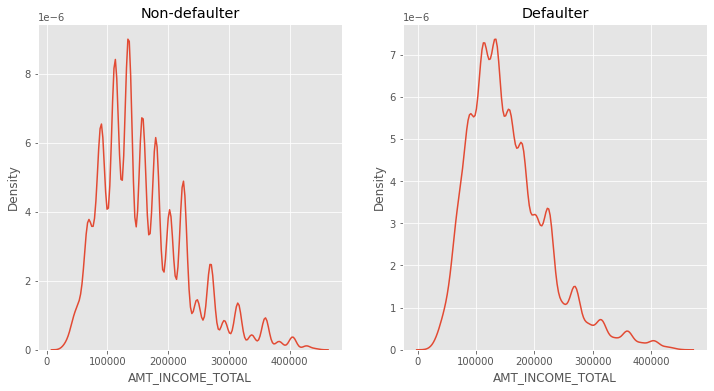

In [227]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,title='Non-defaulter')
ax2=fig.add_subplot(1,2,2,title='Defaulter')
sns.kdeplot(application[application['TARGET']==0]['AMT_INCOME_TOTAL'],ax=ax1)
sns.kdeplot(application[application['TARGET']==1]['AMT_INCOME_TOTAL'],ax=ax2)
plt.show()

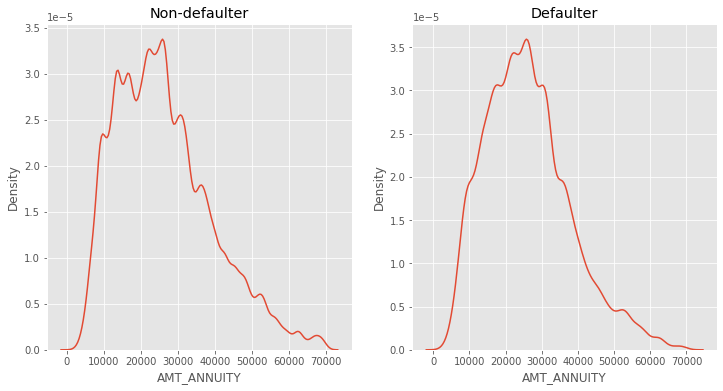

In [228]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,title='Non-defaulter')
ax2=fig.add_subplot(1,2,2,title='Defaulter')
sns.kdeplot(application[application['TARGET']==0]['AMT_ANNUITY'],ax=ax1)
sns.kdeplot(application[application['TARGET']==1]['AMT_ANNUITY'],ax=ax2)
plt.show()

Observation:
- For amount annuity and amount incom distribution is same.

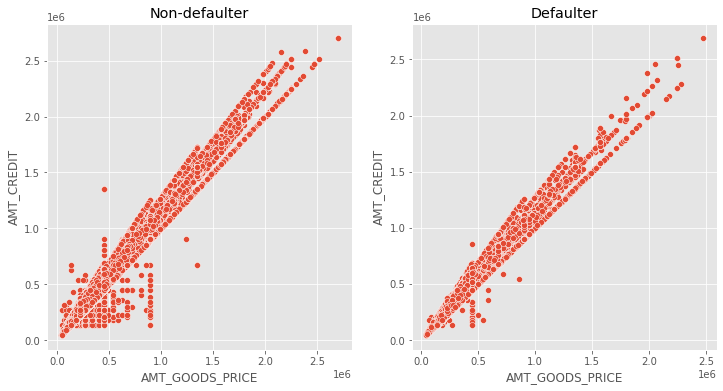

In [229]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,title='Non-defaulter')
ax2=fig.add_subplot(1,2,2,title='Defaulter')
sns.scatterplot(x=application[application['TARGET']==0]['AMT_GOODS_PRICE'],y=application[application['TARGET']==0]['AMT_CREDIT'],ax=ax1)
sns.scatterplot(x=application[application['TARGET']==1]['AMT_GOODS_PRICE'],y=application[application['TARGET']==1]['AMT_CREDIT'],ax=ax2)
plt.show()

Observation:
- Amount goods price and amount credit have lienear relation.

## Top 10 correlation

In [230]:
defaulter_cor=default.corr()
round(defaulter_cor,2)
corr_list=defaulter_cor.unstack()

/tmp/ipykernel_4217/1452194955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  defaulter_cor=default.corr()


In [232]:
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
Birth_Year                   DAYS_BIRTH                    0.999691
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998269
AMT_CREDIT                   AMT_GOODS_PRICE               0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE               0.752295
                             AMT_CREDIT                    0.752195
dtype: float64

In [234]:
non_defaulter_cor=non_default.corr()
round(non_defaulter_cor,2)
non_corr_list=non_defaulter_cor.unstack()

/tmp/ipykernel_4217/3683365986.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  non_defaulter_cor=non_default.corr()


In [235]:
non_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                     1.000000
Birth_Year                   DAYS_BIRTH                     0.999711
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776421
                             AMT_CREDIT                     0.771297
dtype: float64

## Analysis on previous application dataset

In [40]:
#Displaying first 5 rows of dataset
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Datatype information
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [42]:
#Displaying rows and columns
prev_application.shape

(1670214, 37)

In [43]:
#Finding datatype of each columns
prev_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [44]:
#Finding null value percentage of each columns
prev_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Observation:
- By looking at the null percentage we can say that there are many columns which have null values.
- We drop the columns which have greater then and equal to 40% null values.

In [45]:
# Creating dataframe renaming it and storing columns in a list which have greater then 40% null values
temp=prev_application.isnull().mean().reset_index()
temp
temp[0]=temp[0]*100
temp=temp.rename(columns={'index':'column_name',0:'%missing values'})
temp=temp.sort_values(by='column_name',ascending=False)
cols_to_drop=list(temp[temp['%missing values']>=40]['column_name'])

In [46]:
cols_to_drop

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'NFLAG_INSURED_ON_APPROVAL',
 'NAME_TYPE_SUITE',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'AMT_DOWN_PAYMENT']

In [47]:
#Dropping the columns
prev_application.drop(cols_to_drop,axis=1,inplace=True)

In [48]:
prev_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Observation:
- After dropping columns we can see that there are still null values.
- So these values are less in percentage we impute them with appropriate value.

### AMT_ANNUITY Imputation

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
10%         3817.53
25%         6321.78
50%        11250.00
75%        20658.42
99%        69685.79
max       418058.14
Name: AMT_ANNUITY, dtype: float64


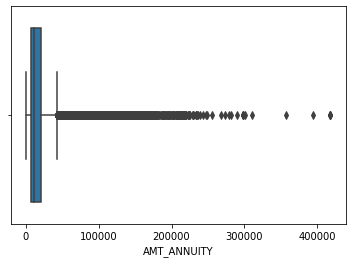

In [49]:
#Finding outliers by using describe and boxplot
print(round(prev_application.AMT_ANNUITY.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(x=prev_application.AMT_ANNUITY)
plt.show()

Observation:
- By looking at the statistical summary we can say it has outliers.
- Missing percentage is 22.286665.
- We impute them with median.

In [50]:
#Imputing NaN with median
prev_application.AMT_ANNUITY=prev_application.AMT_ANNUITY.fillna(prev_application.AMT_ANNUITY.median())

### AMT_GOODS_PRICE Imputation

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
10%        30555.00
25%        50841.00
50%       112320.00
75%       234000.00
99%      1395000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: float64


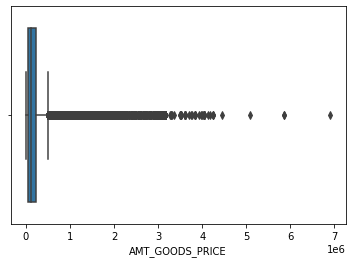

In [51]:
#Finding outliers by using describe method and boxplot
print(round(prev_application.AMT_GOODS_PRICE.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
sns.boxplot(x=prev_application.AMT_GOODS_PRICE)
plt.show()

In [52]:
#Imputing NaN with median
prev_application.AMT_GOODS_PRICE=prev_application.AMT_GOODS_PRICE.fillna(prev_application.AMT_GOODS_PRICE.median())

### CNT_PAYMENT Imputation

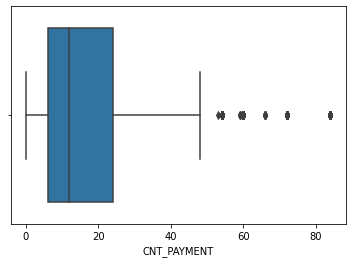

In [53]:
#Finding outliers by using boxplot
sns.boxplot(x=prev_application.CNT_PAYMENT)
plt.show()

In [54]:
#Imputing NaN with median
prev_application.CNT_PAYMENT.value_counts().head()
prev_application.CNT_PAYMENT=prev_application.CNT_PAYMENT.fillna(prev_application.CNT_PAYMENT.median())

### PRODUCT_COMBINATION Imputation

In [55]:
#Finding the distribution of values
prev_application.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [56]:
#Imputing NaN with mode
prev_application.PRODUCT_COMBINATION=prev_application.PRODUCT_COMBINATION.fillna(prev_application.PRODUCT_COMBINATION.mode())

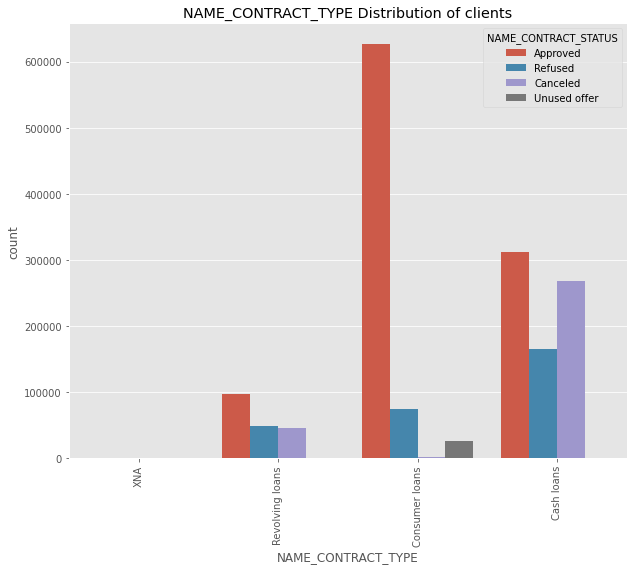

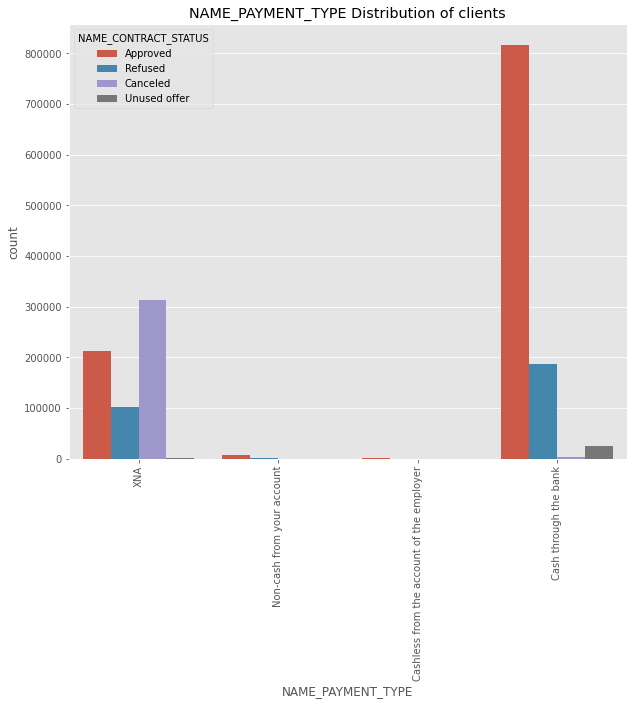

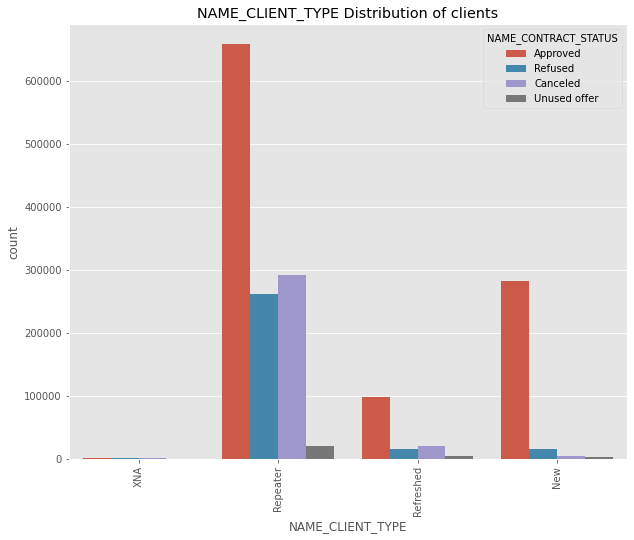

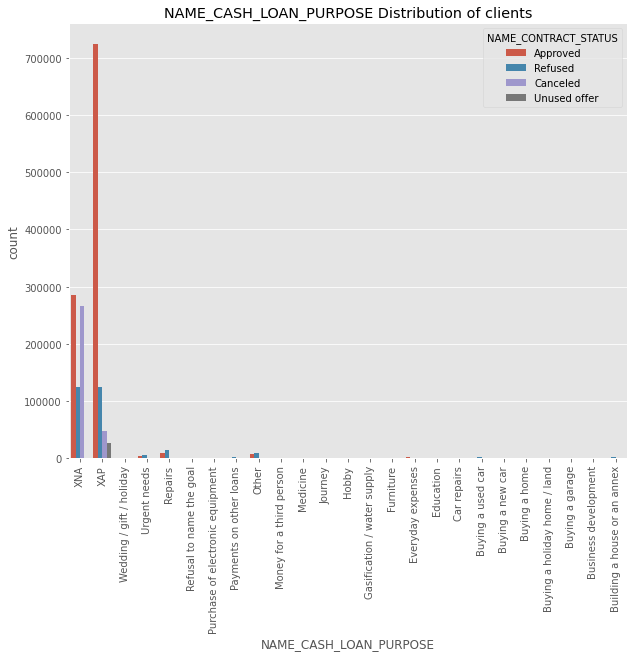

In [57]:
#Plotting a countplot on TARGET's object column
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize=[10,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=prev_application,x=i,hue='NAME_CONTRACT_STATUS',order=sorted(prev_application[i].unique(),reverse=True))
    plt.xticks(rotation=90)

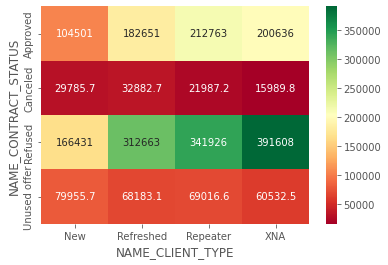

In [58]:
#Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=prev_application,index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
sns.heatmap(res,annot=True,cmap='RdYlGn',fmt='g')
plt.show()

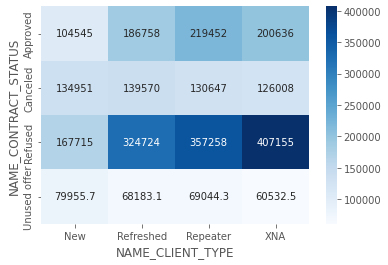

In [59]:
#Checking contract status vs name client type aggregating over AMOUNT GOODS PRICE
res=pd.pivot_table(data=prev_application,index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
sns.heatmap(res,annot=True,cmap='Blues',fmt='g')
plt.show()

## Case Summary

1. The data is highly imbalance as number of defaulters are very less.

CNT_CHILDREN, CNT_FAM_MEMBERS, NAME_INCOME_TYPE, OCCUPATION_TYPE, CODE_GENDER are important driving factors.

Documents: Consider many of people does not submit document except document3 and it have similar impact on defaulter and non defaulters so we can drop them.

Regional info: Default rate is high when REG_REGION_NOT_WORK_REGION=0 i.e. work and permanent address are same.

Assets info: Most of the applicants own reality and many of the does not own car. People who not owning car and owning reality have slightly higher default.